In [1]:
# Install the required library
!pip install ydata_profiling
%matplotlib inline


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data collections from internal source
df = pd.read_csv("McDonalds-data/mcdonalds.csv")



In [3]:
# Finding shape of data
df.shape

(1453, 15)

In [4]:
# Profiling Segments
ydata_profile = ProfileReport(df,title="My Data Report")
ydata_profile.to_file("McDonalds-profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 98.30it/s]


In [5]:
# taking a deeper look into data
print(df.head())          # First few rows
print(df.info())          # Data types & nulls
print(df.describe())      # Summary stats
print(df.columns)         # Column names


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

In [6]:
print(f"{df.isnull().sum()}")         # Count missing
df = df.dropna()          # Drop rows with missing values (or use fillna)

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


44.60495526496903 45.0 14.221178003354499


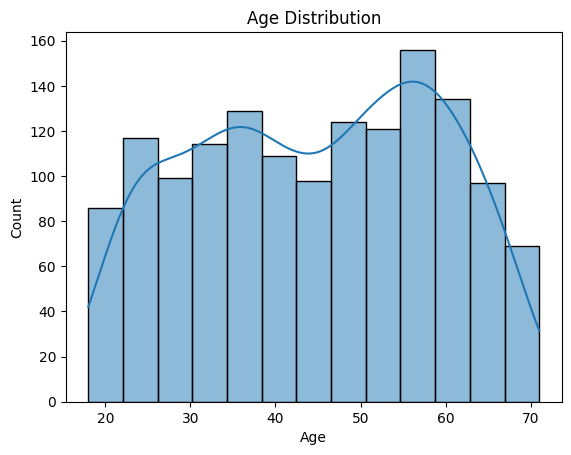

In [7]:
# Univariate Analysis of Age
print(df['Age'].mean(), df['Age'].median(), df['Age'].std())

# Plot
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


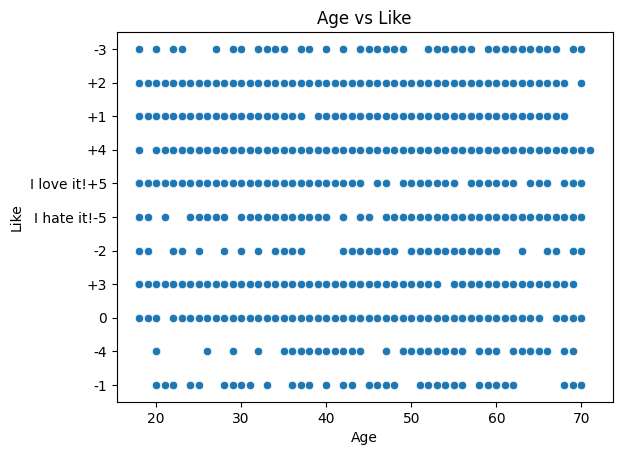

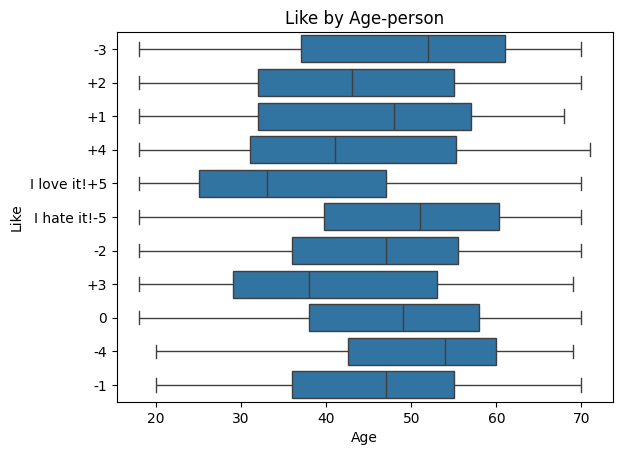

In [8]:
# Bivariate Analysis
# Scatter Plot Age vs Like
sns.scatterplot(x='Age', y='Like', data=df)
plt.title('Age vs Like')
plt.show()

# Boxplot of the Age vs Like
sns.boxplot(x='Age', y='Like', data=df)
plt.title('Like by Age-person')
plt.show()

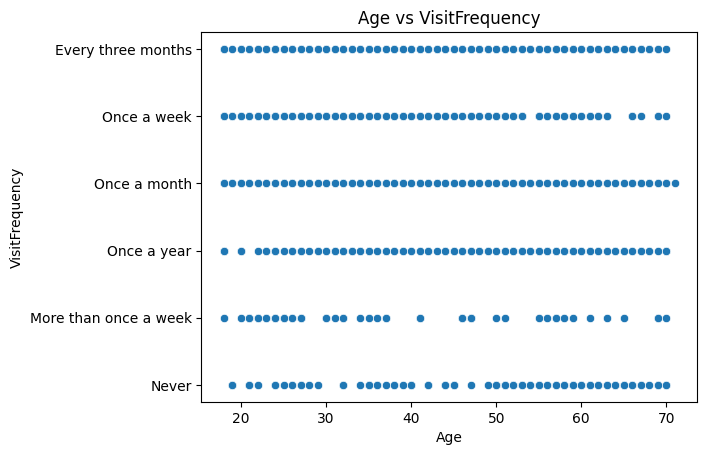

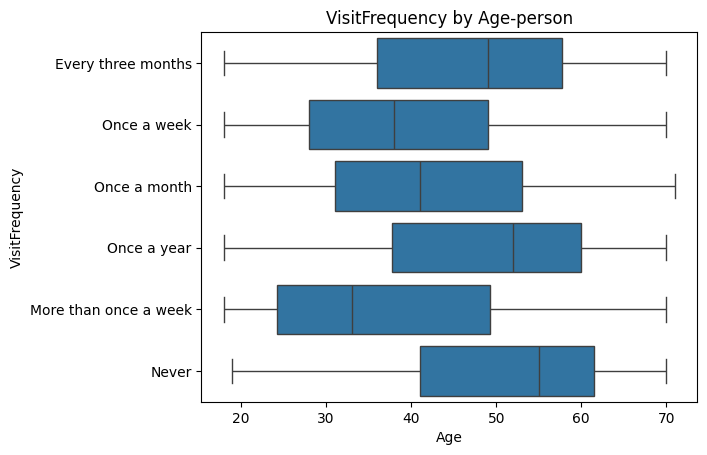

In [9]:
# Bivariate Analysis
# Scatter Plot Age vs Like
sns.scatterplot(x='Age', y='VisitFrequency', data=df)
plt.title('Age vs VisitFrequency')
plt.show()

# Boxplot of the Age vs Like
sns.boxplot(x='Age', y='VisitFrequency', data=df)
plt.title('VisitFrequency by Age-person')
plt.show()

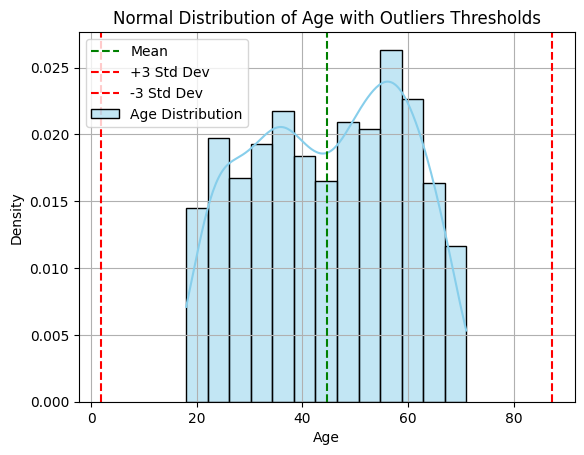

In [10]:
#Outlier Detection using the Z-score Formula

# Thresholds for outliers (Z-score method)
upper_thresold = df['Age'].mean() + 3 * df['Age'].std()
lower_thresold = df['Age'].mean() - 3 * df['Age'].std()

# Plotting the normal distribution
sns.histplot(df['Age'], kde=True, stat="density", color='skyblue', label="Age Distribution")

# Plotting mean and threshold lines
plt.axvline(df['Age'].mean(), color='green', linestyle='--', label='Mean')
plt.axvline(upper_thresold, color='red', linestyle='--', label='+3 Std Dev')
plt.axvline(lower_thresold, color='red', linestyle='--', label='-3 Std Dev')

plt.title('Normal Distribution of Age with Outliers Thresholds')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# selcting object columns
lis_obj_column = df.select_dtypes(include='object').columns.to_list()
lis_obj_column


['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'VisitFrequency',
 'Gender']

In [12]:
# Iterate through each object column and print its unique values
for col in lis_obj_column:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 20)

Unique values for column 'yummy':
['No' 'Yes']
--------------------
Unique values for column 'convenient':
['Yes' 'No']
--------------------
Unique values for column 'spicy':
['No' 'Yes']
--------------------
Unique values for column 'fattening':
['Yes' 'No']
--------------------
Unique values for column 'greasy':
['No' 'Yes']
--------------------
Unique values for column 'fast':
['Yes' 'No']
--------------------
Unique values for column 'cheap':
['Yes' 'No']
--------------------
Unique values for column 'tasty':
['No' 'Yes']
--------------------
Unique values for column 'expensive':
['Yes' 'No']
--------------------
Unique values for column 'healthy':
['No' 'Yes']
--------------------
Unique values for column 'disgusting':
['No' 'Yes']
--------------------
Unique values for column 'Like':
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
--------------------
Unique values for column 'VisitFrequency':
['Every three months' 'Once a week' 'Once a month' 'Once a 

In [13]:
# selecting numerical columns
lis_num_colmumn = df.select_dtypes(include=['integer','float']).columns.to_list()

In [14]:
# fetching some important module of the preprocessing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.decomposition import PCA

In [15]:
# making a pipeline for numerical data
num_pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca',PCA(n_components=0.95))
])

In [16]:
# Separate ordinal from nominal again, but based on mapping

ordinal_mappings = {
    'Like': ['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5'],
    'VisitFrequency' : ['Never','Once a year','Every three months','Once a month','Once a week','More than once a week' ]
}

lis_obj_column = df.select_dtypes(include='object').columns.to_list()
ordinal_cols = list(ordinal_mappings.keys())
nominal_cols = [col for col in lis_obj_column if col not in ordinal_cols]


In [17]:
cat_ordinal_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols]))
])

In [18]:
cat_nominal_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(drop='first',sparse_output=False))
])

In [19]:
comp_pipe = ColumnTransformer(transformers=[
    ('num',num_pipe,lis_num_colmumn),
    ('cat_ordinal',cat_ordinal_pipe,ordinal_cols),
    ('cat_nominal',cat_nominal_pipe,nominal_cols)
],remainder='passthrough')

In [20]:
# transforming all data and storing it in data variable
data = comp_pipe.fit_transform(df)

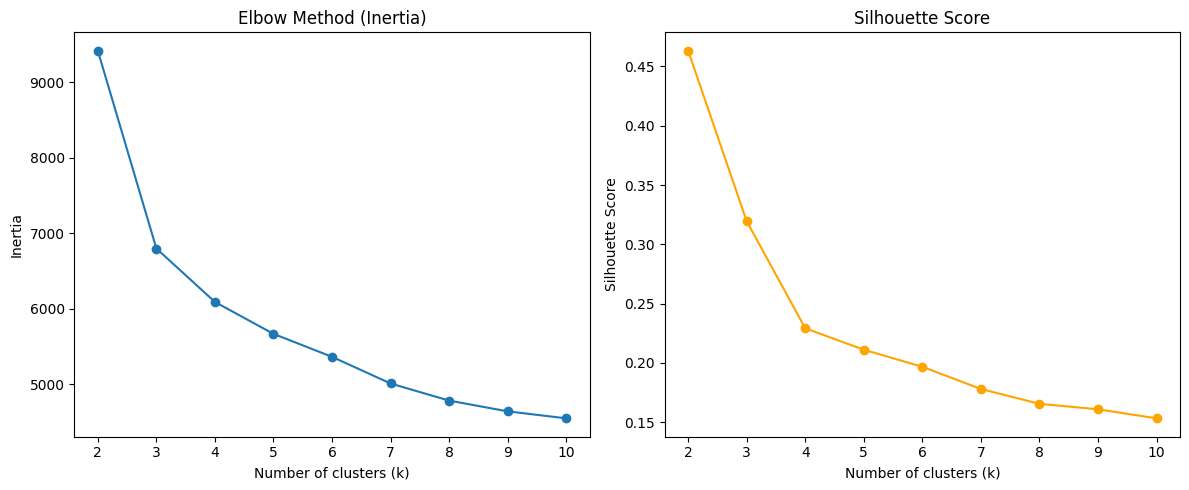

Best k based on silhouette score: 2


In [21]:
# trying to find the best value of k for k means
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

results = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(data, labels)
    results.append({'k': k, 'inertia': inertia, 'silhouette': silhouette})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['k'], results_df['inertia'], marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(results_df['k'], results_df['silhouette'], marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Find best k (e.g., highest silhouette)
best_k = results_df.loc[results_df['silhouette'].idxmax(), 'k']
print(f"Best k based on silhouette score: {best_k}")

In [22]:
# create a model with the best value of k
model = KMeans(n_clusters=2,random_state=42)

In [23]:
# finally creating a pipeline for the complete model
complete_model = Pipeline([
    ('comp',comp_pipe),
    ('model',model)
])

In [24]:
complete_model.fit(df)


Pipeline(steps=[('comp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['Age']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['I '
                                                                                               'hate '
                                                                                               'it!-5',
                                                                                               '-4',
                                                                                               '-3',
                                                                                               '-2',
                                                                                               '-1',
                                                                                               '0',
                                                                                               '+1',
                                                                                               '+2',
                                                                                               '+3',...
                                                                                               'week']]))]),
                                                  ['Like', 'VisitFrequency']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['yummy', 'convenient',
                                                   'spicy', 'fattening',
                                                   'greasy', 'fast', 'cheap',
                                                   'tasty', 'expensive',
                                                   'healthy', 'disgusting',
                                                   'Gender'])])),
                ('model', KMeans(n_clusters=2, random_state=42))])

In [25]:
complete_model.predict(df)

array([1, 0, 0, ..., 0, 0, 1])

In [26]:
import joblib
joblib.dump(complete_model,'model.pkl')

['model.pkl']